In [2]:
#Split and scale the data, train hyper parameters, Model, Evaluate

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import cross_validation, metrics  
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


%store -r df

print(df.info())
print(df.shape)


   

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 16 columns):
search_word                  989 non-null object
contentDetails.caption       989 non-null bool
contentDetails.definition    989 non-null object
catID                        989 non-null int64
description                  975 non-null object
localized.description        974 non-null object
localized.title              989 non-null object
tags                         930 non-null object
title                        989 non-null object
commentCount                 989 non-null float64
dislikeCount                 989 non-null float64
likeCount                    989 non-null float64
view_bucket                  989 non-null float64
date                         989 non-null datetime64[ns, UTC]
Aging                        989 non-null datetime64[ns]
Age                          989 non-null timedelta64[ns]
dtypes: bool(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(1)

In [3]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['commentCount','dislikeCount','likeCount']])




X = pd.DataFrame(minmax_scale.transform(df[['commentCount','dislikeCount','likeCount']]))
print(X.shape)
Y = df['view_bucket']

n = pd.get_dummies(df[['search_word','contentDetails.definition','contentDetails.caption']])

# X = pd.concat([X, n], axis=1)
print(X.shape)





(989, 3)
(989, 3)


In [4]:
#X = pd.concat([X, n], axis=1)
X = pd.DataFrame(np.hstack([X,n]))
X.shape



(989, 26)

In [5]:
# Normalize the time series data and store as new date column
ts = df['Age']
scaled_ts = (ts-ts.min())/(ts.max()-ts.min())

X['Age'] = pd.Series(scaled_ts)
X['Age'].fillna((X['Age'].mean()), inplace=True)

print(X.shape)


(989, 27)


In [6]:
X.head()



,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Age
0,0.000190146,0.000486296,0.000165565,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.083642
1,0.0186383,4.25509e-05,1.24485e-05,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.095886
2,0.0186383,0.000316092,0.000129998,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.484491
3,0.0186383,0.00124005,0.000681999,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.012972
4,0.000104011,0.00013981,0.000127686,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.002331


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.9, random_state=0)

X_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 304 to 684
Data columns (total 27 columns):
0      890 non-null object
1      890 non-null object
2      890 non-null object
3      890 non-null object
4      890 non-null object
5      890 non-null object
6      890 non-null object
7      890 non-null object
8      890 non-null object
9      890 non-null object
10     890 non-null object
11     890 non-null object
12     890 non-null object
13     890 non-null object
14     890 non-null object
15     890 non-null object
16     890 non-null object
17     890 non-null object
18     890 non-null object
19     890 non-null object
20     890 non-null object
21     890 non-null object
22     890 non-null object
23     890 non-null object
24     890 non-null object
25     890 non-null object
Age    890 non-null float64
dtypes: float64(1), object(26)
memory usage: 194.7+ KB


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:


model = sm.OLS(list(y_train), X_train.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     89.54
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          5.96e-220
Time:                        17:03:51   Log-Likelihood:                -6136.2
No. Observations:                 890   AIC:                         1.232e+04
Df Residuals:                     864   BIC:                         1.245e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -1771.5925    300.587     -5.894      0.0

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)



Linear Regression R squared: 0.7738
Linear Regression RMSE: 323.4607
Linear Regression MAE: 117.6629


In [10]:
# predictors=list(X_train)
# feat_imp = pd.Series(regressor.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
# print('Accuracy of the linear regression model on test set: {:.3f}'.format(regressor.score(X_test, y_test)))
# pred=regressor.predict(X_test)
# print(classification_report(y_test, pred))

In [11]:
# Try random forest with default hyperparameters
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
print('Random Forest R squared: %.4f' % forest_reg.score(X_test, y_test))
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest R squared: 0.2962
Random Forest RMSE: 570.5359


In [13]:
# Evaluate and select optimal hyperparameters
print(forest_reg.get_params())

#Create a random grid for possible parameters to attempt and then use random search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [15]:
#Print and evaluate best parameters from the search
print(rf_random.best_params_)

best_random = rf_random.best_estimator_

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [16]:
#Evaluate performance of the base model w/ searched hyperparameters

random_model = RandomForestRegressor(n_estimators = 200, min_samples_split=2, min_samples_leaf=1, 
                                   max_features = 'sqrt', max_depth = 50, bootstrap = True, random_state = 42)




In [17]:
random_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
#Evaluate performance of random forest with random searched hyperparameters
print('Random Forest R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest R squared: 0.7378
Random Forest RMSE: 348.2245


In [19]:
# Try Grid Search to see if we can improve the hyperparameters further. 
# Setting grid around the previously identified optimal values
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}


In [20]:
# Create a based model
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 3, n_jobs = -1, verbose = 2)

In [21]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.2min finished


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [22]:
#Evaluate performance of random forest with grid search hyperparameters
print('Random Forest R squared: %.4f' % grid_search.score(X_test, y_test))
y_pred = grid_search.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest R squared: -127897.2669
Random Forest RMSE: 357.6273


In [23]:
# Try Gradient Boosting
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [24]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting R squared": 0.0026
Gradient Boosting RMSE: 679.1935


In [25]:
print(model.get_params())

{'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}


In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [27]:
#Basic GBM Regressor performance was poor - try tuning learning rate and number of trees
gbm = GradientBoostingRegressor()

gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [28]:
#Print and evaluate best parameters from the search
print(gbm_random.best_params_)

best_random = gbm_random.best_estimator_

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 9}


In [29]:
#Evaluate performance of the base model w/ searched hyperparameters

random_model = GradientBoostingRegressor(n_estimators = 1788, min_samples_split=10, min_samples_leaf=1, 
                                   max_features = 'sqrt', max_depth = 3, random_state = 42)

In [30]:
random_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=1788,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [31]:
#Evaluate performance of GBM with random searched hyperparameters
print('GBM - random searched R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('GBM - random searched RMSE: %.4f' % forest_rmse)

GBM - random searched R squared: 0.6732
GBM - random searched RMSE: 388.7867


Accuracy of the GBM on test set: 0.673


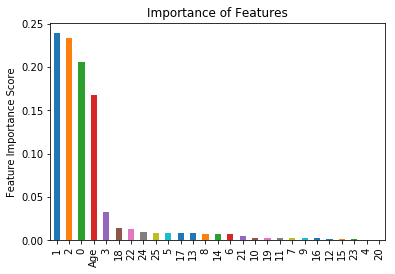

In [32]:
predictors=list(X_train)
feat_imp = pd.Series(random_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(random_model.score(X_test, y_test)))
pred=random_model.predict(X_test)
#print(classification_report(y_test, pred))

In [33]:
print(y_test.value_counts())

1.0       33
2.0       10
3.0        4
44.0       3
6.0        3
4.0        2
21.0       2
16.0       2
17.0       2
9.0        2
67.0       1
2124.0     1
161.0      1
32.0       1
135.0      1
3511.0     1
77.0       1
803.0      1
43.0       1
2872.0     1
14.0       1
1102.0     1
26.0       1
54.0       1
4101.0     1
31.0       1
1497.0     1
1175.0     1
414.0      1
137.0      1
13.0       1
127.0      1
8.0        1
36.0       1
115.0      1
968.0      1
51.0       1
631.0      1
460.0      1
504.0      1
585.0      1
808.0      1
42.0       1
1114.0     1
41.0       1
5.0        1
Name: view_bucket, dtype: int64
